In [47]:
import warnings
import copy
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [7]:
mnist = fetch_openml('mnist_784', cache = False)

X = mnist["data"].astype('float32')
y = mnist["target"].astype('int64')

print("\nNo of Samples: ", X.shape)
print("No. of Labels: ", y.shape)

X_original = copy.deepcopy(X)
print("\nNo. of Samples (copy of X): ", X_original.shape)


No of Samples:  (70000, 784)
No. of Labels:  (70000,)

No. of Samples (copy of X):  (70000, 784)


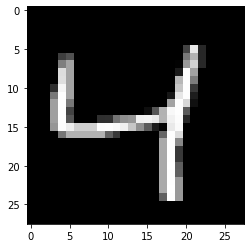

In [12]:
random_digit = X[2]

random_digit_image = random_digit.reshape(28,28)

plt.imshow(random_digit_image, cmap = 'gray', interpolation="nearest")
plt.show()

In [40]:
def visualize_input(img):
    fig  = plt.figure(figsize=(28, 28))
    img = img.reshape(28, 28)
    plt.imshow(img, cmap = 'gray')
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            plt.annotate(str(img[x,y]), xy=(y,x), horizontalalignment='center', verticalalignment='center', color='white' if img[x,y]<100 else 'black')


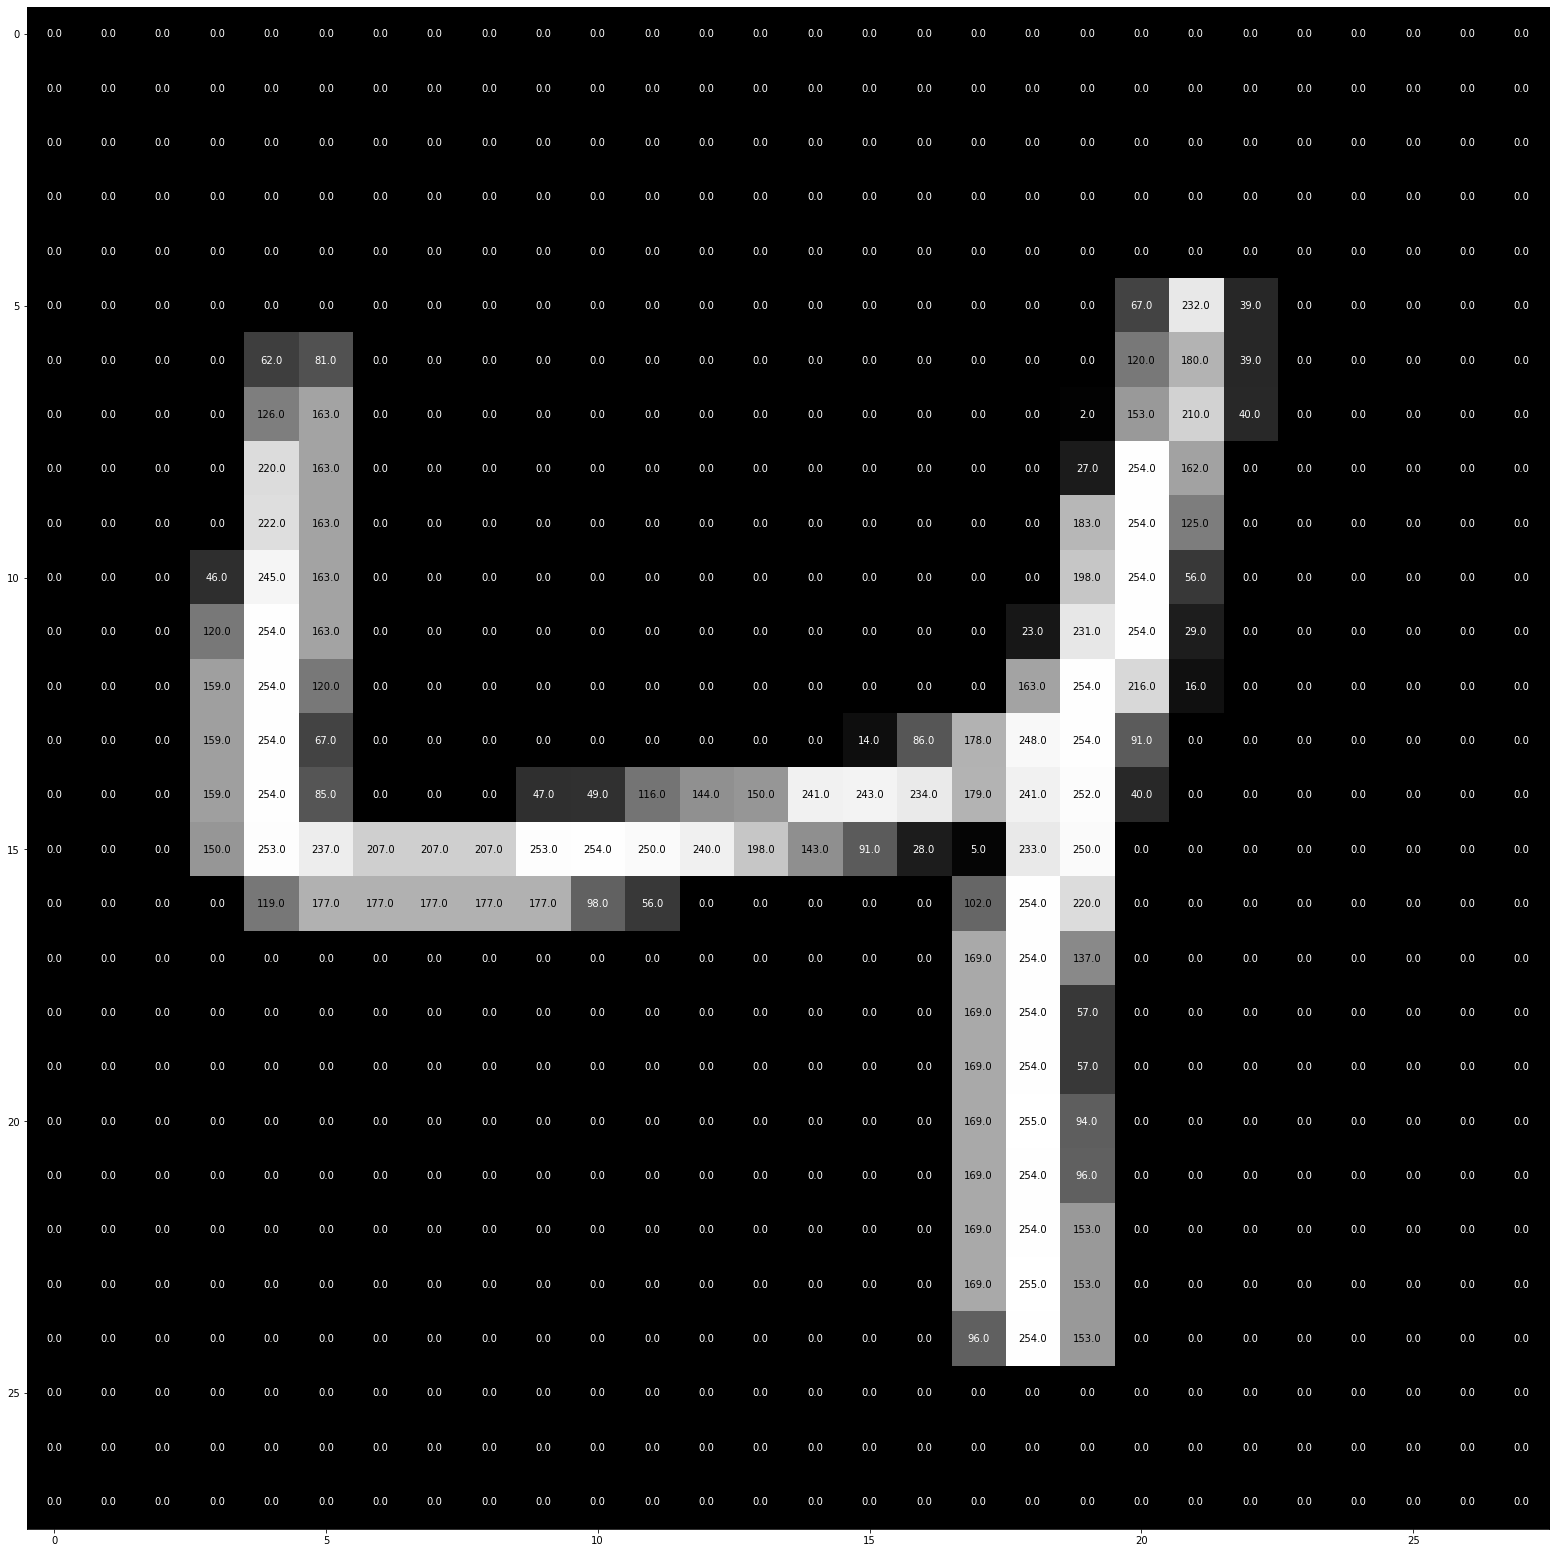

In [41]:
visualize_input(random_digit)

In [42]:
X /= 255.0

X.min(), X.max()

(0.0, 1.0)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimization using Solver: Liblinear library

In [46]:
%%time

log_reg_ovr_liblinear = LogisticRegression(solver='liblinear', multi_class='auto', max_iter = 100)
log_reg_ovr_liblinear.fit(X_train, y_train)

CPU times: user 1min 12s, sys: 77.9 ms, total: 1min 12s
Wall time: 1min 12s


LogisticRegression(solver='liblinear')

In [51]:
print("No. of Iterations: ", log_reg_ovr_liblinear.n_iter_)
y_test_predicted = log_reg_ovr_liblinear.predict(X_test)

accuracy_score_test_liblinear = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test_liblinear)

print("\nConfusion Matrix: ", confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report: ", classification_report(y_test, y_test_predicted))

No. of Iterations:  [15]

Test Accuracy:  0.9167857142857143

Confusion Matrix:  [[1305    1    5    0    1    6   15    2    8    0]
 [   0 1557    4    8    2   11    2    4   11    1]
 [   7   20 1239   17   18    9   16   17   30    7]
 [   9   10   36 1272    1   41    8   12   24   20]
 [   4    2   11    6 1197    3    8    6   14   44]
 [   7   14    7   50   14 1114   17    6   33   11]
 [   4    4   15    1   11   22 1332    1    6    0]
 [   9    5   22    2   13    5    0 1413    2   32]
 [  12   39   14   39   10   40   13    9 1152   29]
 [  10   10    6   22   46    8    0   51   13 1254]]

Classification Report:                precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.94      0.97      0.95      1600
           2       0.91      0.90      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.91      0.92      0.92      1295
           5       0.88      0.88     

# Optimization using Solver: SAG

In [54]:
%%time
softmax_reg_sag = LogisticRegression(solver='sag', multi_class='multinomial', max_iter=100, verbose=1, n_jobs=-1)
softmax_reg_sag.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


max_iter reached after 188 seconds
CPU times: user 3min 8s, sys: 74.9 ms, total: 3min 8s
Wall time: 3min 8s


/home/iman/anaconda3/envs/mdanalysis/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  3.1min finished


LogisticRegression(multi_class='multinomial', n_jobs=-1, solver='sag',
                   verbose=1)

In [55]:
print("No. of Iterations: ", softmax_reg_sag.n_iter_)
y_test_predicted = softmax_reg_sag.predict(X_test)

accuracy_score_test_sag= np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test_sag)

print("\nConfusion Matrix: ", confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report: ", classification_report(y_test, y_test_predicted))

No. of Iterations:  [100]

Test Accuracy:  0.9209285714285714

Confusion Matrix:  [[1296    1    6    0    4   11   13    4    6    2]
 [   0 1549    6   10    3   12    0    4   14    2]
 [   5   20 1234   21   14    9   21   17   29   10]
 [   5    9   30 1284    1   39    7   18   23   17]
 [   6    3    6    4 1201    5   11    8    7   44]
 [   4   11    8   43   12 1122   21    4   34   14]
 [   5    4   19    1   14   17 1332    1    3    0]
 [   6    4   25    3   10    6    0 1417    1   31]
 [  10   25   13   45    6   42    9    9 1180   18]
 [   7   11    6   13   37    6    0   45   17 1278]]

Classification Report:                precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.88      0.88    